### First import the file Activity_2 or its functions 

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb  2 05:37:23 2022
@author: bobbala
"""

import cv2
import Activity_2
from Activity_2 import faceDetection, drawRectangle, put_text

Model Trained Sucessfully


#### Here first creating an object of LBPHF. Using thie object call 'train' method which takes two arrays (faces, faceIds) as inputs.
#### lastly save the model as trainingData. 
#### Dont run this part of the code second time unless there is change in the training dataset.

In [ ]:
# This part of section creates trained model. If no change in dataset no need to run second time.
directory = "Samples"

# Execute the following functions only once unless there is a change in training data.
# faces,faceID = Activity_2.getImagesAndLabels('Samples')
# cv2.destroyAllWindows()
# face_recognizer = Activity_2.train_classifier(faces,faceID)
# face_recognizer.write('trainingData.yml')

#### In below section, first read the trained yml file 
#### Read test image 
#### Call the predict method to predict the test image. This function returns 1. id of the person and 2. confidence level. 

- Create a list 'names' based on the training dataset. In the training data set I provided two persons datasets with ids 1 and 2. So create 'names' list with those two persons names + names[0] as 'None' because, the training ids of persons starts with 1. If the training dataset ids starts with '0' then no need to give names[0] = 'None' 
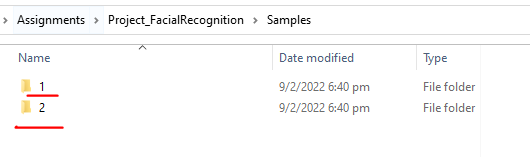

- If ids of training data sets starts with 0 as shown below then 'list 'names' = ['Vanisha', 'Sunil']; no need to use names[0] = 'None'. 
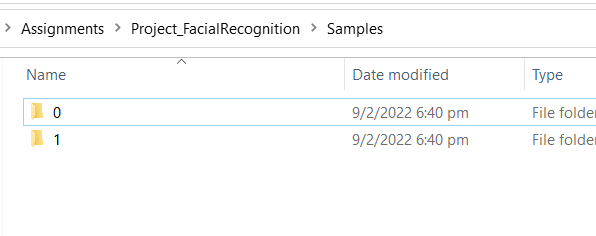

- IF the confidence level is <40 do not display the image. 
- Else, drawthe rectangle around the face, display the name of person and display the image.

In [2]:
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainingData.yml')

cascadePath = 'Haarcascades/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cascadePath);

names = ['None', 'Vanisha', 'Sunil']

#img = cv2.imread('Testing/frame75.jpg') # Passing the image not part of training data
img = cv2.imread('Testing/frame81.jpg') # Passing the image not part of training data
#img = cv2.imread('Testing/frame100.jpg') # Passing the image which is part of the training data

faces,gray_img = faceDetection(img)

for (x,y,w,h) in faces:
    id, confidence = recognizer.predict(gray_img[y:y+h, x:x+w])

    confidence = 100- confidence
    print("id =",id)
    print('confidence level: {}', format(confidence))
    if (confidence) <40: 
        continue
    drawRectangle(faces, img)
    put_text(img, str(names[id]), x+5, y)

img = cv2.resize(img, (500,500))
while True:
    cv2.imshow("Img", img)
    if cv2.waitKey(33 ) == ord('q'):
        break

cv2.destroyAllWindows()


face detected: [[ 41  40 170 170]]
id = 2
confidence level: {} 66.61105192124248
